# Funciones de activación
Hemos implementado las funciones de activación:
   - ReLU y su derivada para las capas ocultas
   - Sigmoid y su derivada para la capa de salida

1. relu
2. relu_derivative
3. sigmoid
4. sigmoid_derivative

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación
def relu(Z):
    """
    Función de activación ReLU
    Args:
        Z (numpy.ndarray): Entrada de la función
    Returns:
        numpy.ndarray: max(0,Z)
    """
    return np.maximum(0, Z)

def relu_derivative(Z):
    """
    Derivada de la función ReLU
    Args:
        Z (numpy.ndarray): Entrada de la función
    Returns:
        numpy.ndarray: 1 si Z > 0, 0 en caso contrario
    """
    return np.where(Z > 0, 1, 0)

def sigmoid(Z):
    """
    Función de activación Sigmoid
    Args:
        Z (numpy.ndarray): Entrada de la función
    Returns:
        numpy.ndarray: 1/(1 + e^(-Z))
    """
    # Clip para evitar desbordamiento
    Z = np.clip(Z, -500, 500)
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    """
    Derivada de la función Sigmoid
    Args:
        Z (numpy.ndarray): Entrada de la función
    Returns:
        numpy.ndarray: sigmoid(Z) * (1 - sigmoid(Z))
    """
    s = sigmoid(Z)
    return s * (1 - s)

# Visualización de las funciones de activación
Hemos creado visualizaciones de las funciones de activación y sus derivadas para mejor comprensión.

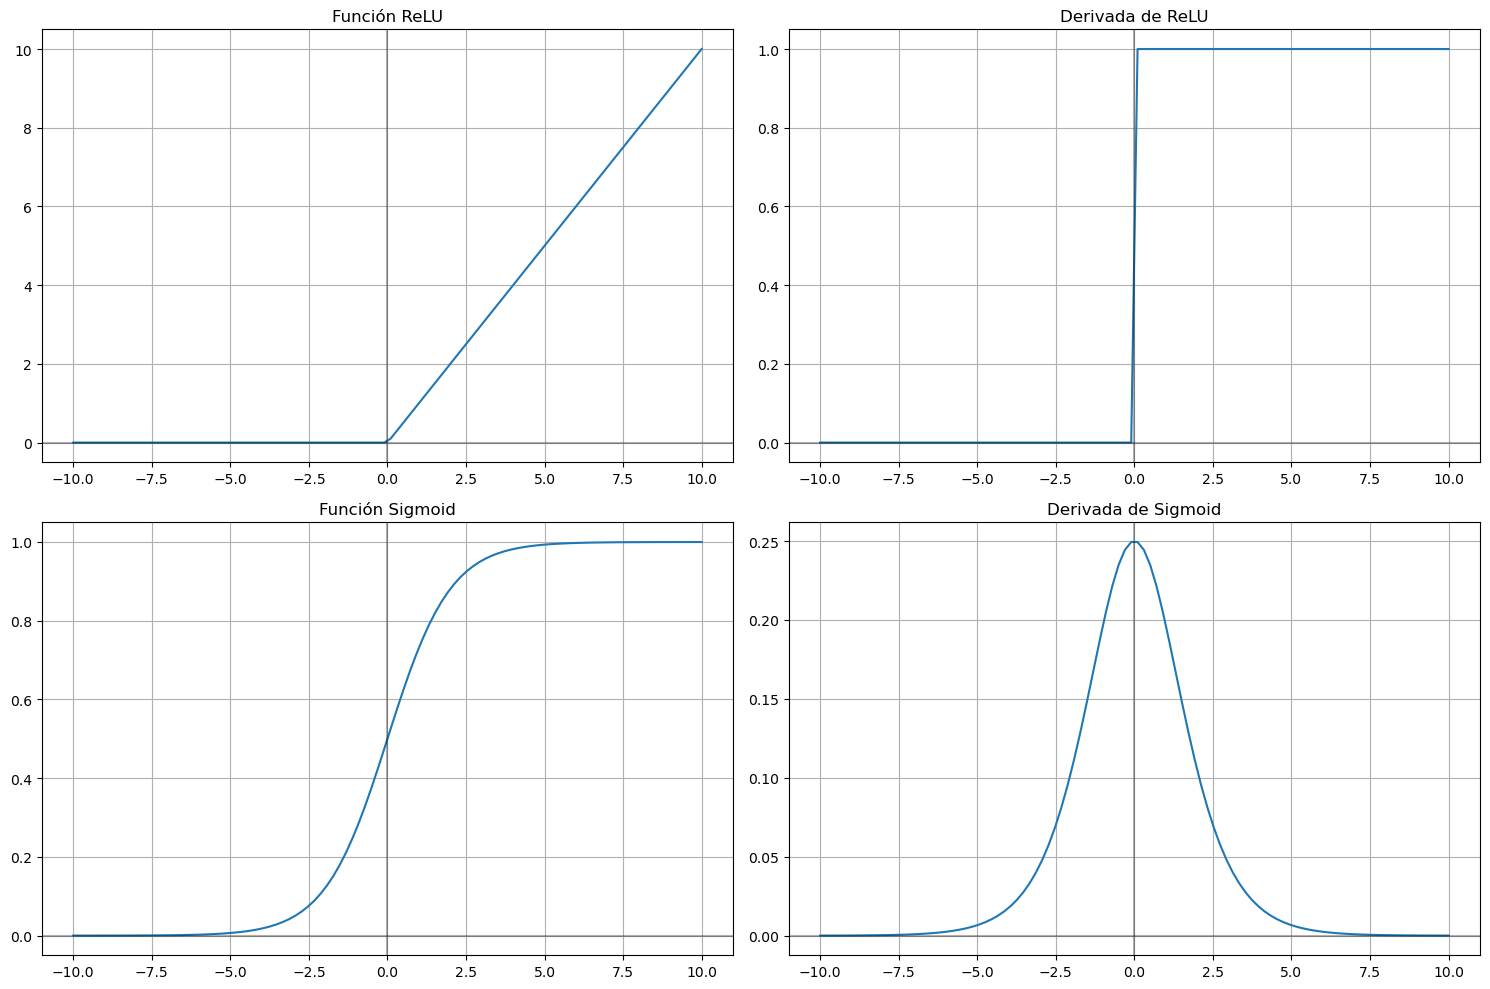

In [2]:
x = np.linspace(-10, 10, 100)

# Crear la figura con dos subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# ReLU y su derivada
ax1.plot(x, relu(x))
ax1.set_title('Función ReLU')
ax1.grid(True)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

ax2.plot(x, relu_derivative(x))
ax2.set_title('Derivada de ReLU')
ax2.grid(True)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Sigmoid y su derivada
ax3.plot(x, sigmoid(x))
ax3.set_title('Función Sigmoid')
ax3.grid(True)
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)

ax4.plot(x, sigmoid_derivative(x))
ax4.set_title('Derivada de Sigmoid')
ax4.grid(True)
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax4.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Función de inicialización de pesos
Hemos implementado la inicialización de parámetros:
- Usando inicialización He para los pesos (buena para ReLU)
- Inicializando sesgos con ceros
- Verificando las dimensiones correctas

## ¿Qué es la "inicialización He"?
La inicialización He (también conocida como inicialización He-et-al o inicialización Kaiming) es un método para inicializar los pesos de una red neuronal propuesto por Kaiming He en 2015 en el paper "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification".

La idea principal es:

1. Problema que resuelve:
- En redes profundas, los pesos mal inicializados pueden llevar a que los gradientes se desvanezcan o exploten durante el entrenamiento
- Especialmente importante cuando se usa ReLU como función de activación

2. La fórmula:
```python
W = np.random.randn(shape) * np.sqrt(2/n_inputs)
```
Donde:
- `n_inputs` es el número de entradas a la capa
- Los pesos siguen una distribución normal multiplicada por `√(2/n_inputs)`

3. ¿Por qué funciona?
- Mantiene la varianza de los valores a través de la red
- Evita que las activaciones se saturen o se vuelvan demasiado pequeñas
- Está específicamente diseñada para funcionar bien con ReLU

4. Ventajas:
- Ayuda a que el entrenamiento converja más rápido
- Reduce el problema del desvanecimiento del gradiente
- Particularmente efectiva en redes profundas con ReLU

En nuestro código, la usamos así:
```python
parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
```

Donde `layer_dims[l-1]` es el número de neuronas en la capa anterior (número de entradas a la capa actual).

Es una mejora significativa sobre inicializaciones más simples como la inicialización aleatoria estándar o la inicialización con valores pequeños aleatorios.

In [3]:
def initialize_parameters(layer_dims):
    """
    Inicializa los parámetros de la red neuronal con la inicialización He
    
    Args:
        layer_dims (list): Lista con el número de neuronas en cada capa
        
    Returns:
        dict: Diccionario con los pesos y sesgos inicializados
    """
    np.random.seed(42)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        # Inicialización He para los pesos
        parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        # Inicialización de sesgos con ceros
        parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        
        # Verificar las dimensiones
        assert parameters[f'W{l}'].shape == (layer_dims[l], layer_dims[l-1])
        assert parameters[f'b{l}'].shape == (layer_dims[l], 1)
    
    return parameters

# Ejemplo de uso de la inicialización
layer_dims = [30, 16, 8, 1]  # Dimensiones de las capas
parameters = initialize_parameters(layer_dims)

# Mostrar las dimensiones de los parámetros inicializados
for key, value in parameters.items():
    print(f"Dimensiones de {key}: {value.shape}")

Dimensiones de W1: (16, 30)
Dimensiones de b1: (16, 1)
Dimensiones de W2: (8, 16)
Dimensiones de b2: (8, 1)
Dimensiones de W3: (1, 8)
Dimensiones de b3: (1, 1)
